Goal: Does having children in a marriage have a causal effect on whether or not a person will have an affair?

In [77]:
dataset = read.csv("Affairs.csv")
dataset$affairs[dataset$affairs > 0] <- 1 # Set as yes/no instead of a count of affairs
dataset$gender[dataset$gender =="male"] <- 1 
dataset$gender[dataset$gender =="female"] <- 0 
dataset$children[dataset$children =="yes"] <- 1 
dataset$children[dataset$children =="no"] <- 0 
dataset$rownames <- 1 # replace rownames with bias term
names(dataset)[names(dataset) == "rownames"] <- "bias"
dataset <- dataset[,c(2,1,3:10)] # Move affairs to column 1
head(dataset)

,affairs,bias,gender,age,yearsmarried,children,religiousness,education,occupation,rating
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>
1,0,1,1,37,10.00,0,3,18,7,4
2,0,1,0,27,4.00,0,4,14,6,4
3,0,1,0,32,15.00,1,1,12,1,4
4,0,1,1,57,15.00,1,5,18,6,5
5,0,1,1,22,0.75,0,2,17,6,3
6,0,1,0,32,1.50,0,2,17,5,5


In [94]:
# Scale data
dataset$"age" <- scale(dataset$"age")
dataset$"yearsmarried" <- scale(dataset$"yearsmarried")
dataset$"religiousness" <- scale(dataset$"religiousness")
dataset$"education" <- scale(dataset$"education")
dataset$"occupation" <- scale(dataset$"occupation")
dataset$"rating" <- scale(dataset$"rating")
# Train test split
LEN = dim(dataset)[1]
test_indices = sample(1:LEN,size = LEN *.2, replace = FALSE)
test = dataset[test_indices,]
train = dataset[-test_indices,]
test = apply(as.matrix(test), 2, as.numeric)
train = apply(as.matrix(train), 2, as.numeric)
y_train = train[,1]
y_test = test[,1]
test = test[,2:10]
train = train[,2:10]

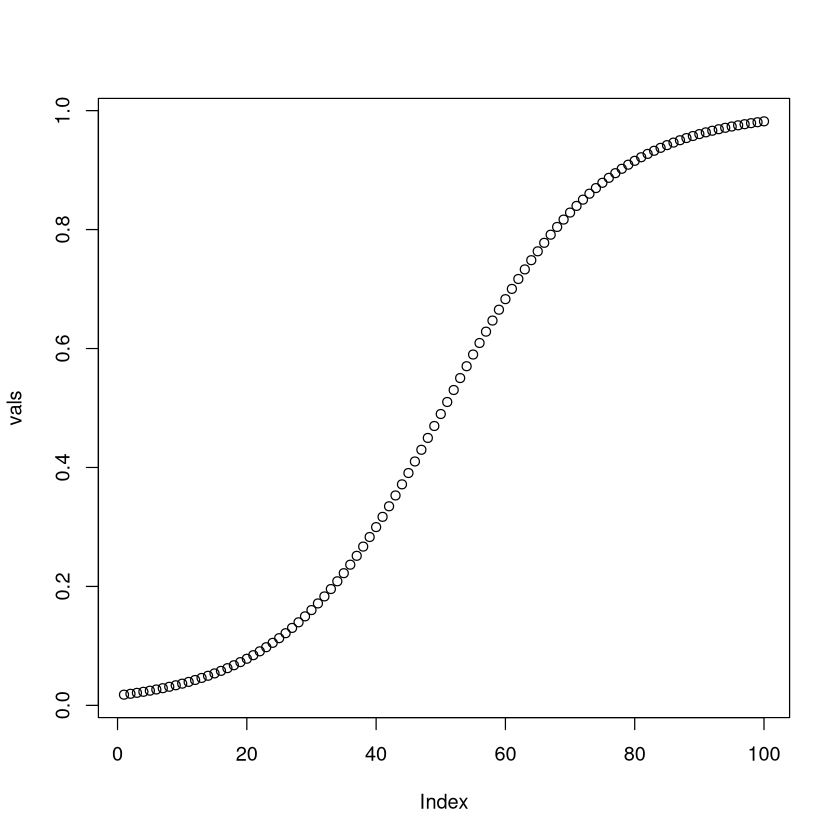

In [80]:
# Define sigmoid function
# h <- function(x, theta) {
#     1 / (1 + exp( (-1)*(x%*%theta) ))
# }
h <- function(x) {
    1 / (1 + exp( (-1)*(x) ))
}
z = seq(-4, 4, length.out = 100)
vals = h(z)
plot(vals)

In [132]:
# Initialize random weights & bias
weights = test[1,]
weights

bias        gender           age  yearsmarried      children 
    1.0000000     1.0000000     2.1006545    -0.2113860     1.0000000 
religiousness     education    occupation        rating 
   -0.9562857     1.5956394     0.9922404    -1.7511025

In [124]:
# Is R useless or is there a way to do matrix ops on dataframes?
# try prediction
pred = test %*% weights
pred = h(pred)
pred

0.999999684
0.994188186
0.182218335
0.971178725
0.963244748
0.529833309
0.999968244
0.009640067
0.999896761
0.077227570
0.999425394


In [133]:
# Run batch gradient descent
lr = .1
for (i in 1:10){
    y_hat = h(train %*% weights)
    weights = weights - lr*( (t(y_train-y_hat) %*% train)*(-1/LEN*.8))
    weights = t(weights) # R is bad
}

ERROR: Error in weights - lr * ((t(y_train - y_hat) %*% train) * (-1/LEN * 0.8)): non-conformable arrays


In [112]:
train

bias,gender,age,yearsmarried,children,religiousness,education,occupation,rating
1,1,0.48579987,0.3270877,0,-0.09976155,0.76319209,1.5418592,0.06183911
1,0,-0.59076990,-0.7498597,0,0.75676260,-0.90170246,0.9922404,0.06183911
1,0,-0.05248502,1.2245438,1,-1.81280985,-1.73414973,-1.7558539,0.06183911
1,1,2.63893940,1.2245438,1,1.61328676,0.76319209,0.9922404,0.96830991
1,1,-1.12905478,-1.3332061,0,-0.95628570,0.34696846,0.9922404,-0.84463170
1,0,-1.12905478,-1.3332061,0,-0.95628570,-1.73414973,-1.7558539,-0.84463170
1,0,-0.05248502,1.2245438,1,0.75676260,-0.06925518,-1.7558539,-1.75110250
1,1,-1.12905478,-1.1985877,0,0.75676260,-0.90170246,-0.1069973,0.96830991
1,1,0.48579987,1.2245438,1,-0.95628570,1.59563937,1.5418592,-1.75110250
1,1,-0.59076990,-0.7498597,1,0.75676260,0.76319209,0.9922404,0.06183911


In [130]:
weights = t(weights)